# Echelle spectrograph

Matthew Kenworthy // 2019 Nov 20 // kenworthy@strw.leidenuniv.nl

Basic echelle spectrograph showing how it works. For the ATI 2019 course.

In [114]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

#  https://stackoverflow.com/questions/44959955/matplotlib-color-under-curve-based-on-spectral-color
def wavelength_to_rgb(wavelength, gamma=0.8):
    ''' taken from http://www.noah.org/wiki/Wavelength_to_RGB_in_Python
    This converts a given wavelength of light to an 
    approximate RGB color value. The wavelength must be given
    in nanometers in the range from 380 nm through 750 nm
    (789 THz through 400 THz).

    Based on code by Dan Bruton
    http://www.physics.sfasu.edu/astro/color/spectra.html
    Additionally alpha value set to 0.5 outside range
    '''
    wavelength = float(wavelength)
    if wavelength >= 380 and wavelength <= 750:
        A = 1.
    else:
        A=0.5
    if wavelength < 380:
        wavelength = 380.
    if wavelength >750:
        wavelength = 750.
    if wavelength >= 380 and wavelength <= 440:
        attenuation = 0.3 + 0.7 * (wavelength - 380) / (440 - 380)
        R = ((-(wavelength - 440) / (440 - 380)) * attenuation) ** gamma
        G = 0.0
        B = (1.0 * attenuation) ** gamma
    elif wavelength >= 440 and wavelength <= 490:
        R = 0.0
        G = ((wavelength - 440) / (490 - 440)) ** gamma
        B = 1.0
    elif wavelength >= 490 and wavelength <= 510:
        R = 0.0
        G = 1.0
        B = (-(wavelength - 510) / (510 - 490)) ** gamma
    elif wavelength >= 510 and wavelength <= 580:
        R = ((wavelength - 510) / (580 - 510)) ** gamma
        G = 1.0
        B = 0.0
    elif wavelength >= 580 and wavelength <= 645:
        R = 1.0
        G = (-(wavelength - 645) / (645 - 580)) ** gamma
        B = 0.0
    elif wavelength >= 645 and wavelength <= 750:
        attenuation = 0.3 + 0.7 * (750 - wavelength) / (750 - 645)
        R = (1.0 * attenuation) ** gamma
        G = 0.0
        B = 0.0
    else:
        R = 0.0
        G = 0.0
        B = 0.0
    return (R,G,B,A)

clim=(350,780)
norm = plt.Normalize(*clim)
wl = np.arange(clim[0],clim[1]+1,2)
colorlist = list(zip(norm(wl),[wavelength_to_rgb(w) for w in wl]))
spectralmap = matplotlib.colors.LinearSegmentedColormap.from_list("spectrum", colorlist)

## The diffraction grating

We use a simple model of the diffraction grating equation $m \lambda = A \sin \beta $, where $A$ is a measure of the spectral resolution of the grating.

In [116]:
def diffgrat(wl, A=5000):
    # grating equations: 
    #  m * wl = A*beta
    # find the closest spectral order that the wavelength is at:
    m = np.round(A / wl)
    
    # now we know the order m, we can solve for beta 
    beta = (m * wl) / A
    return beta

## Echelle spectrograph setup

The echelle with its high spectral resolution has its dispersion pointing along horizontal axis.

The cross disperser with much lower dispersion is along the vertical axis.

`A` changes the number of diffracton orders across the wavelength range.

`C` changes the width of each orders on the detector.

`y_prism_dispersion` changes the vertical dispersion and the separating of the orders.

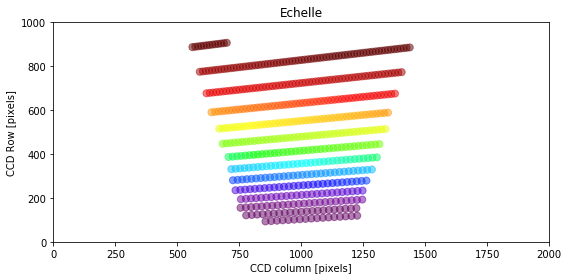

In [132]:
wl = np.linspace(380,750,500)

A = 10000
C = 12000
x_cen = 1000
y_cen = 500

y_prism_dispersion = 2.2 # pixels per nm

# the prism dispersion
wlen_middle = (750+380)/2.
y_pos = ((wl-wlen_middle) * y_prism_dispersion) + y_cen

# the echelle
x_pos_dg = diffgrat(wl,A)

# centrating the echelle spectrum
x_pos_dg = x_pos_dg - x_pos_dg.mean()

x_pos = x_pos_dg*C + x_cen

# setting up the plot
fig, axs = plt.subplots(1, 1, figsize=(8,4), tight_layout=True)
plt.xlim(0,2000)
plt.ylim(0,1000)
plt.xlabel('CCD column [pixels]')
plt.ylabel('CCD Row [pixels]')
plt.title('Echelle')

plt.scatter(x_pos, y_pos, c=(wl-380)/(750-380),cmap=spectralmap, alpha=0.5, s=50);